In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [50]:
df=pd.read_csv('data/data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
#x features
df_x=df.drop(columns='math_score',axis=1)
df_x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [52]:
df_y=df['math_score']
df_y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [53]:

# Create Column Transformer with 3 types of transformers
num_features = df_x.select_dtypes(exclude="object").columns
cat_features = df_x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [54]:
df_x_s=preprocessor.fit_transform(df_x)
df_x_s

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x_s, df_y, test_size=0.2, random_state=42)

In [56]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_score_=r2_score(true,predicted)
    return mae, rmse, r2_score_ 


In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list=[]
r2_list=[]

for i in range(len((models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #train model
    
    
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Evaluate train and test dataset 
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print(f'rmse:{model_train_rmse}')
    print(f'mae:{model_train_mae}')
    print(f'r2 score:{model_train_r2}')
    
    print("------------------------------------------------")
    
    print('model performance for testing set')
    print(f'rmse:{model_test_rmse}')
    print(f'mae:{model_test_mae}')
    print(f'r2 score:{model_test_r2}')
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
model performance for training set
rmse:5.323050852720514
mae:4.266711846071957
r2 score:0.8743172040139593
------------------------------------------------
model performance for testing set
rmse:5.393993869732843
mae:4.21476314247485
r2 score:0.8804332983749565


Lasso
model performance for training set
rmse:6.593815587795566
mae:5.206302661246526
r2 score:0.8071462015863456
------------------------------------------------
model performance for testing set
rmse:6.519694535667419
mae:5.157881810347763
r2 score:0.8253197323627853


Ridge
model performance for training set
rmse:5.323324922741654
mae:4.264987823725981
r2 score:0.8743042615212909
------------------------------------------------
model performance for testing set
rmse:5.390387016935642
mae:4.211100688014261
r2 score:0.8805931485028737


K-Neighbors Regressor
model performance for training set
rmse:5.707683417990174
mae:4.516749999999999
r2 score:0.8554978341651085
-------------------------------------------

In [58]:
df_list=pd.DataFrame(models.keys(),columns=['Model Name'])
df_list

,Model Name
0,Linear Regression
1,Lasso
2,Ridge
3,K-Neighbors Regressor
4,Decision Tree
5,Random Forest Regressor
6,XGBRegressor
7,CatBoosting Regressor
8,AdaBoost Regressor


In [59]:
r2_list

[0.8804332983749565,
 0.8253197323627853,
 0.8805931485028737,
 0.7838129945787431,
 0.7241290318338577,
 0.8517841945134612,
 0.8277965784072876,
 0.8516318920747058,
 0.8492399097267793]

Text(0, 0.5, 'Predicted')

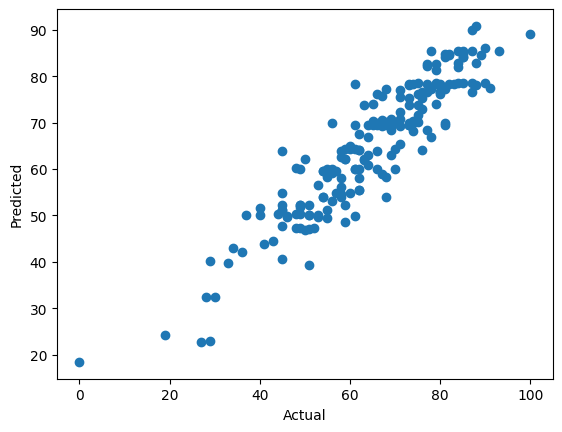

In [60]:
##LINEAR REGRESSION
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

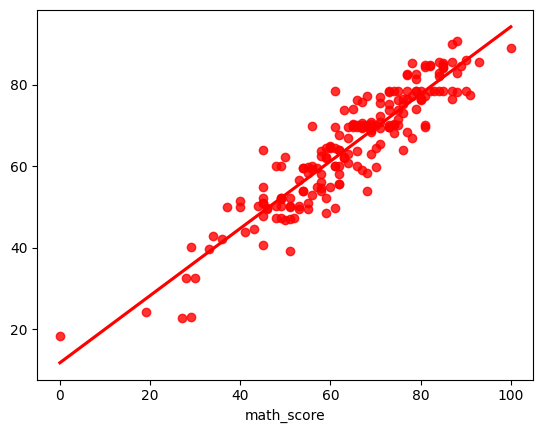

In [61]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='r')

In [62]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,77.575269,13.424731
737,53,56.510417,-3.510417
740,80,76.605000,3.395000
660,74,78.381579,-4.381579
411,84,82.960784,1.039216
